In [76]:
"""
Taiwan Stock Exchange web scraper

Created on 2021-06-12 20:00:24.997804

@author: Jack.M.Liu
"""

'\nTaiwan Stock Exchange web scraper\n\nCreated on 2021-06-12 20:00:24.997804\n\n@author: Jack.M.Liu\n'

In [77]:
import numpy as np
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup
import time
import datetime
import json
import matplotlib.pyplot as plt

In [78]:
def getstock(stocknumber):
    print("開始爬取"+str(stocknumber)+"股價資訊")
    df=pd.DataFrame(columns=["日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"])
    for year in range(2017,2022):
        for month in ["01","02","03","04","05","06","07","08","09","10","11","12"]:
            print('\r' + "正在爬取"+str(year)+"年"+month+"月資料...", end='')
            try:
                url="https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+str(year)+month+"01&stockNo="+str(stocknumber)
                response = rq.get(url)
                soup = BeautifulSoup(response.text, "html.parser")
                history_data = json.loads(soup.contents[0])["data"]
                #print(history_data[0]) #check point
                for data in range(len(history_data)):
                    a_series = pd.Series(history_data[data], index = df.columns)
                    df = df.append(a_series, ignore_index=True)
                time.sleep(3)
            except:
                pass
        print("爬取完成")

    for i in range(len(df)):
        df.iloc[i,0]=df.iloc[i,0].replace(df.iloc[i,0][0:3],str(int(df.iloc[i,0][0:3])+1911))
    df=df.set_index(pd.to_datetime(df["日期"],format='%Y/%m/%d'))
    df1 = df[df['收盤價'] != "--"]
    #print(df.head())
    df1.to_csv(str(stocknumber)+'.csv',encoding='utf_8_sig')
    return df1

In [79]:
# volatility analysis & draw pictire
def get_volatility(stocknumber,df):
    adj_close=[]
    for i in df['收盤價']:
        try:
            templist = i.split(",")
            close=''
            for x in templist:
                close+=x
            adj_close.append(close)
        except:
            adj_close.append(i)
    a_serie = pd.Series(adj_close, index = df.index)
    df['Log Return']=np.log(a_serie.astype('float')).diff(1)
    df['Cummulative Return']=np.exp(np.cumsum(df['Log Return']))-1
    Expected_Return = df['Cummulative Return'].tolist()[-1]
    Volatility = df['Log Return'].std()*(365**0.5)
    #print(Volatility)
    
    fig,ax = plt.subplots()
    df['Log Return'].hist(ax=ax ,bins=50, alpha=0.5,color="b")
    ax.set_xlabel("Log Return")
    ax.set_ylabel("Freq of Log Return")
    ax.set_title("Volatility of " + str(stocknumber) + " is " +str(round(Volatility,4)*100) +"%")
    plt.savefig(str(stocknumber)+'.png')
    plt.show()
    return df

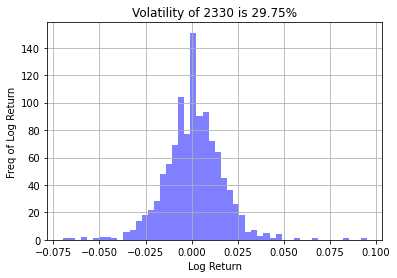

,日期,日期.1,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,Log Return,Cummulative Return
日期,,,,,,,,,,,,
2017-01-03,2017-01-03,2017/01/03,"23,550,783","4,300,648,272",181.5,183.5,181.0,183.0,+1.50,"8,743",NaN,NaN
2017-01-04,2017-01-04,2017/01/04,"24,482,374","4,478,699,942",183.0,184.0,181.5,183.0,0.00,"8,476",0.000000,0.000000
2017-01-05,2017-01-05,2017/01/05,"21,373,561","3,913,389,163",182.0,183.5,181.5,183.5,+0.50,"8,297",0.002729,0.002732
2017-01-06,2017-01-06,2017/01/06,"23,120,808","4,250,912,732",184.0,184.5,183.5,184.0,+0.50,"9,659",0.002721,0.005464
2017-01-09,2017-01-09,2017/01/09,"18,583,788","3,419,409,204",184.0,185.0,183.0,184.0,0.00,"5,759",0.000000,0.005464
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2021-06-07,2021/06/07,"17,729,179","10,471,176,330",594.0,595.0,583.0,592.0,-3.00,"25,364",-0.005055,2.234973
2021-06-08,2021-06-08,2021/06/08,"14,083,552","8,312,653,665",590.0,595.0,588.0,589.0,-3.00,"14,051",-0.005080,2.218579
2021-06-09,2021-06-09,2021/06/09,"21,575,159","12,618,113,390",586.0,588.0,583.0,586.0,-3.00,"36,405",-0.005106,2.202186


In [86]:
#台積電
#df2330 = getstock(2330)
df2330 = pd.read_csv (r'2330.csv',encoding='utf_8_sig')
df2330.set_index(pd.to_datetime(df2330['日期'],format='%Y-%m-%d'),inplace=True)
get_volatility(2330,df2330)

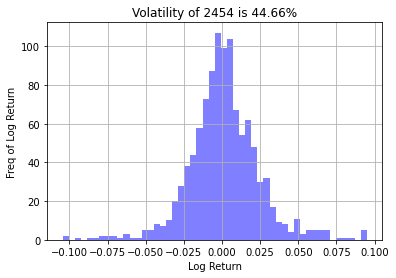

,日期,日期.1,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,Log Return,Cummulative Return
日期,,,,,,,,,,,,
2017-01-03,2017-01-03,2017/01/03,"3,406,879","740,467,501",217.50,218.00,216.50,218.00,+1.50,"2,057",NaN,NaN
2017-01-04,2017-01-04,2017/01/04,"3,339,918","722,614,731",218.00,218.50,215.50,216.00,-2.00,"2,501",-0.009217,-0.009174
2017-01-05,2017-01-05,2017/01/05,"3,652,571","792,875,978",215.50,218.00,215.50,218.00,+2.00,"2,436",0.009217,0.000000
2017-01-06,2017-01-06,2017/01/06,"4,249,760","934,984,700",218.50,222.00,218.00,220.00,+2.00,"3,080",0.009132,0.009174
2017-01-09,2017-01-09,2017/01/09,"2,446,956","533,879,915",220.50,221.00,217.00,217.00,-3.00,"1,751",-0.013730,-0.004587
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2021-06-07,2021/06/07,"5,423,299","5,227,747,851",971.00,976.00,948.00,973.00,-4.00,"8,011",-0.004103,3.463303
2021-06-08,2021-06-08,2021/06/08,"3,584,585","3,476,996,181",975.00,977.00,966.00,966.00,-7.00,"4,429",-0.007220,3.431193
2021-06-09,2021-06-09,2021/06/09,"3,982,070","3,877,203,073",963.00,984.00,963.00,967.00,+1.00,"4,939",0.001035,3.435780


In [87]:
#聯發科
#df2454 = getstock(2454)
df2454 = pd.read_csv (r'2454.csv',encoding='utf_8_sig')
df2454.set_index(pd.to_datetime(df2454['日期'],format='%Y-%m-%d'),inplace=True)
get_volatility(2454,df2454)

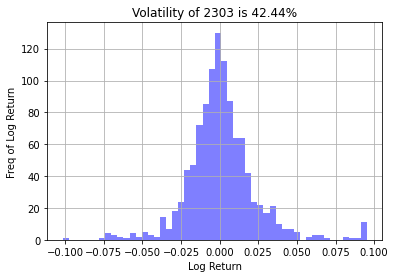

,日期,日期.1,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,Log Return,Cummulative Return
日期,,,,,,,,,,,,
2017-01-03,2017-01-03,2017/01/03,"10,177,659","115,653,736",11.40,11.40,11.30,11.40,0.00,"1,753",NaN,NaN
2017-01-04,2017-01-04,2017/01/04,"11,119,880","126,388,748",11.40,11.40,11.35,11.35,-0.05,"2,773",-0.004396,-0.004386
2017-01-05,2017-01-05,2017/01/05,"20,844,127","237,518,324",11.35,11.45,11.30,11.40,+0.05,"4,089",0.004396,0.000000
2017-01-06,2017-01-06,2017/01/06,"37,951,970","437,951,865",11.40,11.65,11.40,11.60,+0.20,"7,806",0.017392,0.017544
2017-01-09,2017-01-09,2017/01/09,"30,051,835","350,356,384",11.60,11.75,11.55,11.60,0.00,"5,869",0.000000,0.017544
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2021-06-07,2021/06/07,"183,701,585","9,642,415,177",53.50,53.60,51.50,52.30,-0.70,"66,241",-0.013296,3.587719
2021-06-08,2021-06-08,2021/06/08,"107,619,446","5,653,210,762",52.60,53.20,52.20,52.20,-0.10,"36,694",-0.001914,3.578947
2021-06-09,2021-06-09,2021/06/09,"210,880,690","10,755,821,558",51.70,51.90,50.20,50.70,-1.50,"87,577",-0.029157,3.447368


In [88]:
#聯電
#df2303 = getstock(2303)
df2303 = pd.read_csv (r'2303.csv',encoding='utf_8_sig')
df2303.set_index(pd.to_datetime(df2303['日期'],format='%Y-%m-%d'),inplace=True)
get_volatility(2303,df2303)

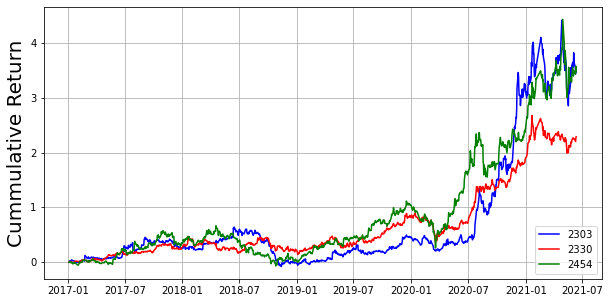

In [89]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df2303['Cummulative Return'],color='blue',label='2303')
ax.plot(df2330['Cummulative Return'],color='red',label='2330')
ax.plot(df2454['Cummulative Return'],color='green',label='2454')
ax.set_ylabel('Cummulative Return',color='black',fontsize=20)
ax.tick_params(axis='y',labelcolor='black')
ax.legend(loc='lower right')
plt.grid()
plt.savefig('comparison.png')
plt.show()